In [1]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [5]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/제목 없음.png'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

-rw-r--r-- 1 root root 2327 Nov 29 23:48 /aiffel/aiffel/ocr_python/my_google_api_key.json
Texts:

"from sklearn.model_selection import StratifiedKFold
skfold =
StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)
cv_accuracy =
[]
for train_idx, test_idx in skfold.split(X, y):
X_train, X_test =
X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test =
y.iloc[train_idx], y.iloc[test_idx]
wine_tree_cv.fit(X_train, y_train)
pred
wine_tree_cv.predict(X_test)
cv_accuracy.append (accuracy_score(y_test, pred))
Cv_accuracy
[0.5523076923076923,
0.6884615384615385,
0.7143956889915319,
0.7321016166281755,
0.7567359507313318]
"

"from"

"sklearn.model_selection"

"import"

"StratifiedKFold"

"skfold"

"="

"StratifiedKFold(n_splits=5)"

"wine_tree_cv"

"="

"DecisionTreeClassifier(max_depth=2,"

"random_state=13)"

"cv_accuracy"

"="

"[]"

"for"

"train_idx,"

"test_idx"

"in"

"skfold.split(X,"

"y):"

"X_train,"

"X_test"

"="

"X.iloc[train_idx],"

"X.iloc

In [6]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [7]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


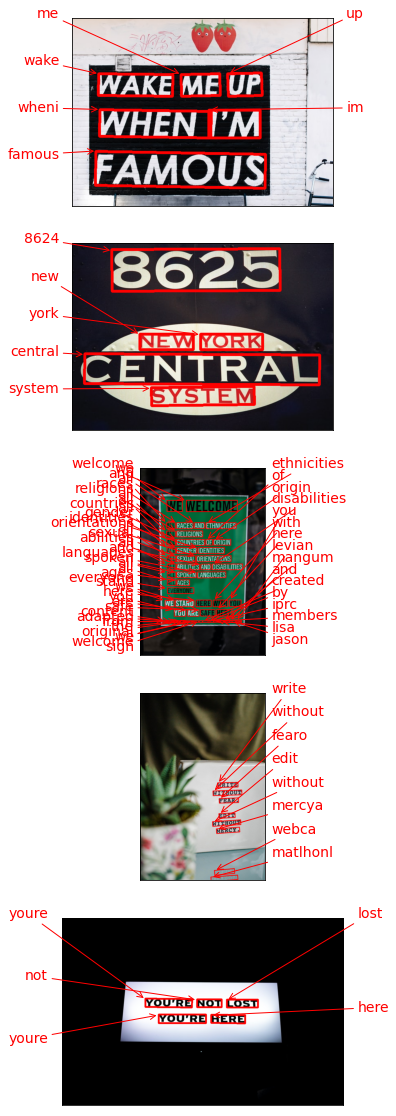

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [11]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/'
img_file_path = work_dir + '/제목 없음.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/0000.png
/aiffel/aiffel/0001.png
/aiffel/aiffel/0002.png
/aiffel/aiffel/0003.png
/aiffel/aiffel/0004.png
/aiffel/aiffel/0005.png
/aiffel/aiffel/0006.png
/aiffel/aiffel/0007.png
/aiffel/aiffel/0008.png
/aiffel/aiffel/0009.png
/aiffel/aiffel/0010.png
/aiffel/aiffel/0011.png
/aiffel/aiffel/0012.png
/aiffel/aiffel/0013.png
/aiffel/aiffel/0014.png
/aiffel/aiffel/0015.png
/aiffel/aiffel/0016.png
/aiffel/aiffel/0017.png
/aiffel/aiffel/0018.png
/aiffel/aiffel/0019.png
/aiffel/aiffel/0020.png
/aiffel/aiffel/0021.png
/aiffel/aiffel/0022.png
/aiffel/aiffel/0023.png
/aiffel/aiffel/0024.png
/aiffel/aiffel/0025.png
/aiffel/aiffel/0026.png
/aiffel/aiffel/0027.png
/aiffel/aiffel/0028.png
/aiffel/aiffel/0029.png
/aiffel/aiffel/0030.png
/aiffel/aiffel/0031.png
/aiffel/aiffel/0032.png
/aiffel/aiffel/0033.png
/aiffel/aiffel/0034.png
/aiffel/aiffel/0035.png
/aiffel/aiffel/0036.png
/aiffel/aiffel/0037.png
/aiffel/aiffel/0038.png
/aiffel/aiffel/0039.png
/aiffel/aiffel/0040.png
/aiffel/aiffel/0

In [12]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

IIE EK ED I EE EDEDED?Di—C I EED?—i——iiEiERERE— IIE IEEE iii i i iE IEEE EiERERERiIEiRiIEiERERERERERE———— III Ii Ei ii IER iI IEEE iE Iii IiiEiEERERERERERERE—E—)—)?—) i Iii iE IEEE EEii iii iE EERIE EERE ii iiiEiEiERER—2?—)2)——— EERE —i2?£— EDIE II —i—)2)?)—) iii Iii EE EER EERE EEiDE2?)2—) i —————— iI iEiEiIERERERIEIEEI EERE iI IEIEIEIIiiEi Ii———)—) i i) iI ERIE ED?D—)——?iEi)2?2——— ERIE EIEIEIEIERERE iI iIEiERERERER———— iF iIiIEREIEiIERIIIII III iI EIR EEi)?— Ei?) —i—)——)?)—— IEEE III Ei)?£—)——) 2) iE III Ei iEiEiERERE—R?——)—— iE?) iI) —)—)—)?———— III EiiEiERERE—i)——)?)——))—) i) iE EERIE EiE—i)———)—)— iE Ei EiEiER)?—)——)— ——i)— IEEE SEE —tti‘ ee ee


from

sklearn.model selection

import

StratifiedaKFola

skTfold

—

StratifiedKFold(n_splits=5)

Wine _tree_cv

a

DecisionTreeClassifier(max_depth=2,

random_state=13)

CV_aCCUuracy

a

|

for

train_1ax,

test _1dax

in

SkfTold.split(X,

y):

X_traln,

X_ test

ae

X.iloc|train_idx|],

X.iloc| test_idx |

y_

# 프로젝트 : 다양한 OCR모델 비교하기
우리는 지금까지 Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능을 간단히 활용하여 보았습니다.

지금까지 살펴본 바로는 무료로 사용할 수 있는 기능들이지만 모두 준수한 성능을 갖추고 있었습니다. OCR 분야가 이미 실용적인 수준에까지 기술이 발전했기 때문에 이런 것들만 잘 활용해도 실전에 활용할 수 있는 좋은 서비스를 만들어 낼 수 있을 것도 같습니다. 그런데 과연 어떤 것을 사용하는 것이 좋을까요?

OCR 기술들이 실용적인 수준까지 꽤 발전했지만 그럼에도 불구하고 아직 완전한 수준은 아닙니다. 용도에 맞게 적절한 것을 선택하는 것도 중요한 일입니다. 그래서 오늘 다뤄본 위 3가지를 검증해 보는 프로젝트를 진행하겠습니다. 여러분은 OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정합니다.

# Step1. 검증용 데이터셋 준비
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

In [4]:
import os

img_path = os.getcwd() + '/ocr_pic'
img = os.listdir(img_path)
print(img)

['1.png', '5.jpg', '4.jpg', '3.jpg', '2.png']


In [6]:
os.chdir('./ocr_pic')
print(os.getcwd())

/aiffel/aiffel/ocr_pic


20장 넘지 않게 구하라고해서 5장 모음

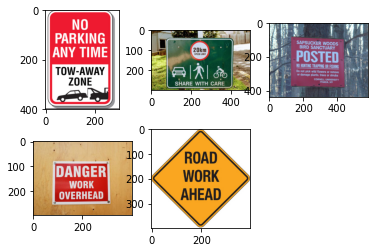

In [7]:
import matplotlib.pyplot as plt

for i in range(len(img)):
    plt.subplot(2,3,i+1)
    plt.imshow(plt.imread(img[i]))

# Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.

1. Google OCR API

In [8]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [9]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for image in img:
    detect_text(image)
    print('---------------------------------------------------------------------')

total 392
-rw-r--r-- 1 root root  72895 Nov 30 07:07 1.png
-rw-r--r-- 1 root root 134990 Nov 30 07:07 2.png
-rw-r--r-- 1 root root  20099 Nov 30 07:07 3.jpg
-rw-r--r-- 1 root root 130268 Nov 30 07:07 4.jpg
-rw-r--r-- 1 root root  38589 Nov 30 07:07 5.jpg
Texts:

"NO
PARKING
ANY TIME
TOW-AWAY
ZONE
"

"NO"

"PARKING"

"ANY"

"TIME"

"TOW-AWAY"

"ZONE"
bounds: (96,274),(188,274),(188,307),(96,307)
---------------------------------------------------------------------
Texts:

"20km
SPEED LIMIT
SHARE WITH CARE
"

"20km"

"SPEED"

"LIMIT"

"SHARE"

"WITH"

"CARE"
bounds: (297,259),(364,259),(364,277),(297,277)
---------------------------------------------------------------------
Texts:

"SAPSUCKER WOODS
BIRD SANCTUARY
POSTED
NO HUNTING TRAPPING OR FISHING
Do not pick wild flowers or remove
or damage plants, trees or shrubs
CORNELL UNIVERSITY
ITHACA, NY
"

"SAPSUCKER"

"WOODS"

"BIRD"

"SANCTUARY"

"POSTED"

"NO"

"HUNTING"

"TRAPPING"

"OR"

"FISHING"

"Do"

"not"

"pick"

"wild"

"flowers"



2. keras-ocr

In [10]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [11]:
import cv2 

cv2_img_array = [cv2.imread(i) for i in img]

prediction_groups = [pipeline.recognize([url]) for url in cv2_img_array]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


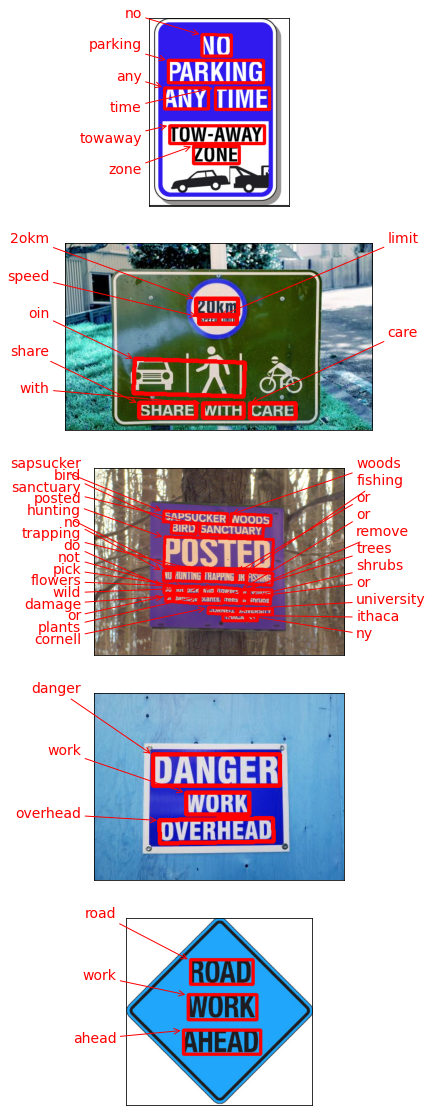

In [12]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(cv2_img_array), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=cv2_img_array[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

2번째 사진에서 그림을 문자(oin)로 잘못 인식함

3. Tesseract

In [13]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [33]:
cropped_image_path_list = []
work_dir = os.getenv('HOME')+'/aiffel/'
for i in range(len(img)):
    try:
        cropped_image_path_list.append(crop_word_regions(os.getcwd() + '/' + img[i],os.getcwd()+'/'+str(i)))
    except:
        continue
for cropped_image in cropped_image_path_list:
    print(cropped_image)
    print('------------------------------------------------------')

/aiffel/aiffel/ocr_pic/0/0000.png
/aiffel/aiffel/ocr_pic/0/0001.png
/aiffel/aiffel/ocr_pic/0/0002.png
/aiffel/aiffel/ocr_pic/1/0000.png
/aiffel/aiffel/ocr_pic/1/0001.png
/aiffel/aiffel/ocr_pic/1/0002.png
/aiffel/aiffel/ocr_pic/1/0003.png
/aiffel/aiffel/ocr_pic/1/0004.png
/aiffel/aiffel/ocr_pic/1/0005.png
/aiffel/aiffel/ocr_pic/1/0006.png
/aiffel/aiffel/ocr_pic/1/0007.png
/aiffel/aiffel/ocr_pic/1/0008.png
/aiffel/aiffel/ocr_pic/1/0009.png
/aiffel/aiffel/ocr_pic/1/0010.png
/aiffel/aiffel/ocr_pic/1/0011.png
/aiffel/aiffel/ocr_pic/1/0012.png
/aiffel/aiffel/ocr_pic/2/0000.png
/aiffel/aiffel/ocr_pic/2/0001.png
/aiffel/aiffel/ocr_pic/2/0002.png
/aiffel/aiffel/ocr_pic/2/0003.png
/aiffel/aiffel/ocr_pic/2/0004.png
/aiffel/aiffel/ocr_pic/2/0005.png
/aiffel/aiffel/ocr_pic/2/0006.png
/aiffel/aiffel/ocr_pic/2/0007.png
/aiffel/aiffel/ocr_pic/2/0008.png
/aiffel/aiffel/ocr_pic/2/0009.png
/aiffel/aiffel/ocr_pic/2/0010.png
/aiffel/aiffel/ocr_pic/2/0011.png
/aiffel/aiffel/ocr_pic/2/0012.png
/aiffel/aiffel

In [34]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.

for i in range(len(cropped_image_path_list)):
    print('이미지 이름: ',img[i])
    print(recognize_images(cropped_image_path_list[i]))
    print('------------------------------------------------------')

이미지 이름:  1.png
TOW-AWAY

/ONE

LC al ))

Done
None
------------------------------------------------------
이미지 이름:  5.jpg
he

SAPSUC

ie

Ta

OO

ne


'’

BIRD

ey AN Tom ney ma


TED

H

ool a Tt et

aM aN ht

7

&:

."


Do not pick wild flowe

i> OF remove

r

ah


or dama

Bel El te ac-l-t-e

r shrubs

CORNELL UNIVE

RSITY

ITHACA.

wy


Done
None
------------------------------------------------------
이미지 이름:  4.jpg

rods



| |

Done
None
------------------------------------------------------
이미지 이름:  3.jpg

Done
None
------------------------------------------------------


인식 잘 못함..

# Step3. 테스트 결과 정리
모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

1. google: 모든 글씨를 잘 인식함
2. keras: 대부분의 글씨를 잘 인식하지만 그림을 문자로 인식하는 경우가 있음
3. tesseract: 글씨 인식 잘 못 함

# Step4. 결과 분석과 결론 제시
- 우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
- 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다.
- 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

평가문항

1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?

시험 문제를 찍으면 텍스트로 바꿔 구글에 검색해서 답안 제시 서비스 

2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?

그런것 같다

3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?

5장의 테스트 이미지를 사용해 테스트 결과가 잘 정리되었다.